### A simple linear network for MNIST dataset, including two hidden layers

##### with changing different parameters

In [40]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torch.utils.data import DataLoader, TensorDataset

### Q1

In [58]:
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

x_train, y_train = load_mnist('Data', kind='train')
x_test, y_test = load_mnist('Data', kind='t10k')

In [59]:
train_data  = TensorDataset(torch.from_numpy(x_train.copy()).float(), torch.from_numpy(y_train.copy()).long())
test_data = TensorDataset(torch.from_numpy(x_test.copy()).float(), torch.from_numpy(y_test.copy()).long())

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=True)

class Net1(nn.Module):
    def __init__(self):
        super(Net1, self).__init__()
        self.fc1 = nn.Linear(784, 100)
        self.fc2 = nn.Linear(100, 100)
        self.fc3 = nn.Linear(100, 10)
        
    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        return x

class Net2(nn.Module):
    def __init__(self):
        super(Net2, self).__init__()
        self.fc1 = nn.Linear(784, 100)
        self.fc2 = nn.Linear(100, 100)
        self.fc3 = nn.Linear(100, 10)
        
    def forward(self, x):
        x = self.fc1(x)
        return x


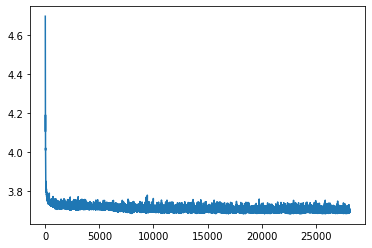

In [42]:
model1 = Net1()

loss_his = []
learning_rate = 10e-3
epoch = 30

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model1.parameters(), lr=learning_rate)

for i in range(epoch):
    for x, y in train_loader:
        y_hat = model1(x)
        loss = criterion(y_hat, y)
        loss_his.append(loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
plt.plot(loss_his)

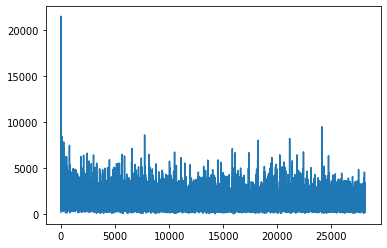

In [43]:
model2 = Net2()
loss_his = []
learning_rate = 10e-3
epoch = 30

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model2.parameters(), lr=learning_rate)

for i in range(epoch):
    for x, y in train_loader:
        y_hat = model2(x)
        loss = criterion(y_hat, y)
        loss_his.append(loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

plt.plot(loss_his)

### Q2

In [44]:
class Net3(nn.Module):
    def __init__(self):
        super(Net3, self).__init__()
        self.fc1 = nn.Linear(784, 100)
        self.fc2 = nn.Linear(100, 100)
        self.fc3 = nn.Linear(100, 10)
        
    def forward(self, x):
        x = torch.tanh(self.fc1(x))
        return x

class Net4(nn.Module):
    def __init__(self):
        super(Net4, self).__init__()
        self.fc1 = nn.Linear(784, 100)
        self.fc2 = nn.Linear(100, 100)
        self.fc3 = nn.Linear(100, 10)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        return x

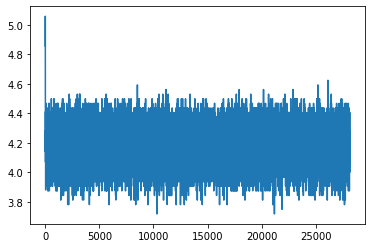

In [45]:
model3 = Net3()
loss_his = []
learning_rate = 10e-2
epoch = 30

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model3.parameters(), lr=learning_rate)

for i in range(epoch):
    for x, y in train_loader:
        y_hat = model3(x)
        loss = criterion(y_hat, y)
        loss_his.append(loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

plt.plot(loss_his)

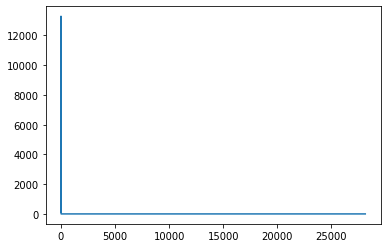

In [46]:
model4 = Net4()
loss_his = []
learning_rate = 10e-3
epoch = 30

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model4.parameters(), lr=learning_rate)

for i in range(epoch):
    for x, y in train_loader:
        y_hat = model4(x)
        loss = criterion(y_hat, y)
        loss_his.append(loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

plt.plot(loss_his)

### Q3

In [38]:
class Net5(nn.Module):
    def __init__(self):
        super(Net5, self).__init__()
        self.fc1 = nn.Linear(784, 100)
        self.fc2 = nn.Linear(100, 100)
        self.fc3 = nn.Linear(100, 10)
        
    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

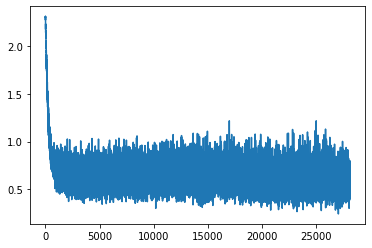

In [39]:
model5 = Net5()
loss_his = []
learning_rate = 10e-3
epoch = 30

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model5.parameters(), lr=learning_rate)

for i in range(epoch):
    for x, y in train_loader:
        y_hat = model5(x)
        loss = criterion(y_hat, y)
        loss_his.append(loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

plt.plot(loss_his)

### Q4

<AxesSubplot:>

Text(0.5, 1.0, 'T-shirt')

(0.0, 1.0, 0.0, 1.0)

<AxesSubplot:>

Text(0.5, 1.0, 'Pullover')

(0.0, 1.0, 0.0, 1.0)

<AxesSubplot:>

Text(0.5, 1.0, 'Trouser')

(0.0, 1.0, 0.0, 1.0)

<AxesSubplot:>

Text(0.5, 1.0, 'Trouser')

(0.0, 1.0, 0.0, 1.0)

<AxesSubplot:>

Text(0.5, 1.0, 'Trouser')

(0.0, 1.0, 0.0, 1.0)

<AxesSubplot:>

Text(0.5, 1.0, 'Dress')

(0.0, 1.0, 0.0, 1.0)

<AxesSubplot:>

Text(0.5, 1.0, 'T-shirt')

(0.0, 1.0, 0.0, 1.0)

<AxesSubplot:>

Text(0.5, 1.0, 'Trouser')

(0.0, 1.0, 0.0, 1.0)

<AxesSubplot:>

Text(0.5, 1.0, 'T-shirt')

(0.0, 1.0, 0.0, 1.0)

<AxesSubplot:>

Text(0.5, 1.0, 'Pullover')

(0.0, 1.0, 0.0, 1.0)

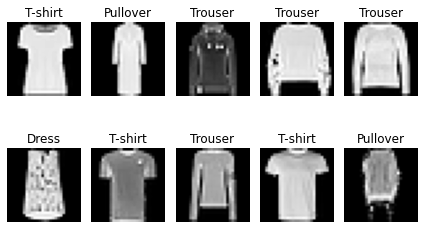

In [49]:
def load_mnist_sub(path, kind):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=0)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=0).reshape(len(labels), 784)

    return images, labels

x_train, y_train = load_mnist_sub('fashion_sub', kind='train_sub')
x_test, y_test = load_mnist_sub('fashion_sub', kind='test_sub')

text_labels = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

fig = plt.figure(figsize=(6, 4))
columns = 5
rows = 2
for i in range(1, columns*rows +1):
    img = x_train[i].reshape(28, 28)
    fig.add_subplot(rows, columns, i)
    plt.title(text_labels[y_train[i]])
    plt.axis('off')
    plt.imshow(img, cmap='gray')

plt.tight_layout()
plt.show()

In [51]:
class Net6(nn.Module):
    def __init__(self):
        super(Net6, self).__init__()
        self.fc1 = nn.Linear(784, 100)
        self.fc2 = nn.Linear(100, 100)
        self.fc3 = nn.Linear(100, 10)
        
    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        return x

class Net7(nn.Module):
    def __init__(self):
        super(Net7, self).__init__()
        self.fc1 = nn.Linear(784, 100)
        self.fc2 = nn.Linear(100, 100)
        self.fc3 = nn.Linear(100, 10)
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        return x

train_data  = TensorDataset(torch.from_numpy(x_train.copy()).float(), torch.from_numpy(y_train.copy()).long())
test_data = TensorDataset(torch.from_numpy(x_test.copy()).float(), torch.from_numpy(y_test.copy()).long())

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=True)

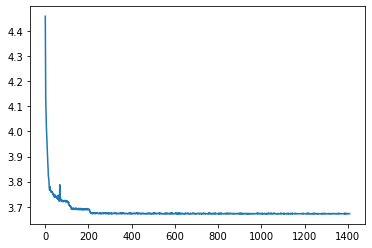

In [52]:
model6 = Net6()
loss_his = []
learning_rate = 10e-3
epoch = 30

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model6.parameters(), lr=learning_rate)

for i in range(epoch):
    for x, y in train_loader:
        y_hat = model6(x)
        loss = criterion(y_hat, y)
        loss_his.append(loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

plt.plot(loss_his)

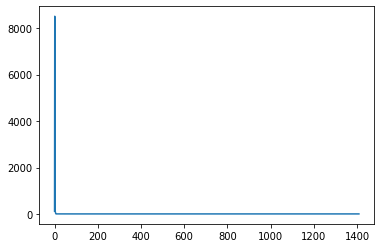

In [53]:
model7 = Net7()
loss_his = []
learning_rate = 10e-3
epoch = 30

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model7.parameters(), lr=learning_rate)

for i in range(epoch):
    for x, y in train_loader:
        y_hat = model7(x)
        loss = criterion(y_hat, y)
        loss_his.append(loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

plt.plot(loss_his)

### Q5

In [55]:
np.random.seed(3)

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=1, keepdims=True)

num_classes, pixel_per_image = 10, 784
n_train_images = 1000
images = x_train[:n_train_images]
images = images.reshape(n_train_images, pixel_per_image)/255
labels = y_train[:n_train_images]
one_hot_labels = np.zeros((n_train_images, num_classes))

for i, j in enumerate(labels):
    one_hot_labels[i][j] = 1

test_images = x_test.reshape(len(x_test), pixel_per_image)/255
one_hot_test_labels = np.zeros((len(y_test), num_classes))
for i, j in enumerate(y_test):
    one_hot_test_labels[i][j] = 1

lr = 0.05
batch_size, epochs = 100, 2000
num_batches = int(np.floor(n_train_images/batch_size))

b_0_1 = np.zeros((1, 10))
weights_0_1 = np.random.random(size=(pixel_per_image, 10))-0.5

for e in range(epochs):
    total_loss = 0
    train_acc = 0
    for i in range(num_batches):
        batch_start, batch_end = ((i * batch_size), ((i + 1) * batch_size))
        layer_0 = images[batch_start:batch_end]
        layer_1 = softmax(np.dot(layer_0, weights_0_1) + b_0_1)
        labels_batch = one_hot_labels[batch_start:batch_end]

        for j in range(len(layer_0)):
            total_loss += -np.log(layer_1[j][np.argmax(labels_batch[j])])
            train_acc += int(np.argmax(layer_1[j]) == np.argmax(labels_batch[j]))

        layer_1_delta = (layer_1 - labels_batch) / batch_size
        b_0_1 -= lr * np.sum(layer_1_delta, axis=0, keepdims=True)
        weights_0_1 -= lr * np.dot(layer_0.T, layer_1_delta)
        weights_0_1[weights_0_1 < 0] = 0
    
    if (e%200 == 0 or e == epochs-1):
        layer_0 = test_images
        layer_1 = softmax(np.dot(layer_0, weights_0_1) + b_0_1)
        test_acc = 0
        for j in range(len(test_images)):
            test_acc += int(np.argmax(layer_1[i]) == np.argmax(one_hot_test_labels[j]))
        print('Loss:%10.3f;tAcc:%0.3f;vAcc:%0.3f' % (total_loss, train_acc/n_train_images, test_acc/len(test_images)))

Loss:  2137.455;tAcc:0.251;vAcc:0.249
Loss:   499.747;tAcc:0.812;vAcc:0.261
Loss:   411.531;tAcc:0.866;vAcc:0.261
Loss:   363.640;tAcc:0.890;vAcc:0.261
Loss:   330.626;tAcc:0.906;vAcc:0.261
Loss:   305.636;tAcc:0.913;vAcc:0.261
Loss:   285.675;tAcc:0.921;vAcc:0.261
Loss:   269.046;tAcc:0.929;vAcc:0.261
Loss:   254.867;tAcc:0.934;vAcc:0.261
Loss:   242.588;tAcc:0.940;vAcc:0.261
Loss:   231.746;tAcc:0.943;vAcc:0.261


<AxesSubplot:>

Text(0.5, 1.0, 'T-shirt')

(0.0, 1.0, 0.0, 1.0)

<AxesSubplot:>

Text(0.5, 1.0, 'Trouser')

(0.0, 1.0, 0.0, 1.0)

<AxesSubplot:>

Text(0.5, 1.0, 'Pullover')

(0.0, 1.0, 0.0, 1.0)

<AxesSubplot:>

Text(0.5, 1.0, 'T-shirt')

(0.0, 1.0, 0.0, 1.0)

<AxesSubplot:>

Text(0.5, 1.0, 'T-shirt')

(0.0, 1.0, 0.0, 1.0)

<AxesSubplot:>

Text(0.5, 1.0, 'Trouser')

(0.0, 1.0, 0.0, 1.0)

<AxesSubplot:>

Text(0.5, 1.0, 'Pullover')

(0.0, 1.0, 0.0, 1.0)

<AxesSubplot:>

Text(0.5, 1.0, 'Dress')

(0.0, 1.0, 0.0, 1.0)

<AxesSubplot:>

Text(0.5, 1.0, 'Trouser')

(0.0, 1.0, 0.0, 1.0)

<AxesSubplot:>

Text(0.5, 1.0, 'T-shirt')

(0.0, 1.0, 0.0, 1.0)

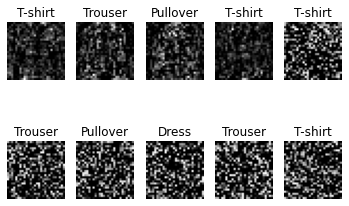

In [60]:
fig = plt.figure(figsize=(6, 4))
columns = 5
rows = 2
for i in range(1, columns*rows +1):
    img = weights_0_1[:, i-1].reshape(28, 28)
    fig.add_subplot(rows, columns, i)
    plt.title(text_labels[np.argmax(layer_1[i])])
    plt.axis('off')
    plt.imshow(img, cmap='gray')

plt.show()